In [7]:
import os                       # Модуль для работы с ОС (нужен для получения данных из файловой системы)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Графика
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import time                     # Замер времени работы
import graphviz                 # Графика
%matplotlib inline              # Вывод графики в браузере

UsageError: unrecognized arguments: # Вывод графики в браузере


# Оценка качества вина

Датасет содержит информацию о красном и белом винах португальского вина "Vinho Verde", описанного через несколько показателей:
1. тип вина (красное/белое)
2. фиксированная кислотность
3. летучая кислотность
4. лимонная кислота
5. остаточный сахар
6. свободный диоксид серы
7. общий диоксид серы
8. плотность
9. pH
10. сульфаты
11. спирт

На основе указанных параметров эксперты оценивают качество вина по шкале от 0(плохое) до 10(превосходное).  
Выходная переменная: оценка качества.

## Цель задачи
Построить классификатор, который будет предсказывать оценку качества вина по представленным характеристикам

## Описание данных
Число объектов: 6497  
Число признаков: 11  
Количество классов: 7  
Пропущенные значения: есть (NaN)  
Классы не сбалансированы  
Датасет взят с сайта Kaggle: https://www.kaggle.com/rajyellow46/wine-quality

## Вывод данных

In [8]:
data = pd.read_csv('winequalityN.csv', sep = ',', engine = 'python')
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
data.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Из данных выше видим, что среди переменных есть одна категориальная (type - тип object). Среди данных имеются пропущенные значения. Данные разбиваются на 7 классов.

## Обработка данных
### Обработка категориальных признаков  
Для категориального признака type изменим тип с object на тип category для удобства последующей обработки:

In [12]:
data['type'] = data['type'].astype('category')
data['type'].dtype
bi_data = data.replace({'type': {'red': 1, 'white': 0}})

### Обработка выбросов  
Проверим, содержатся ли в данных выбросы, значительно отличающиеся от остальных данных. Построим график зависимости таких параметров как остаточный сахар и общий диоксид серы.

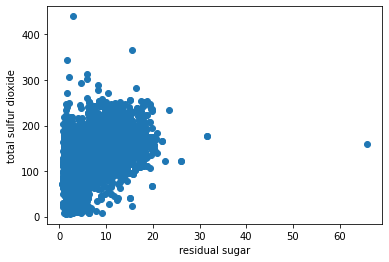

In [13]:
plt.scatter(bi_data['residual sugar'], bi_data['total sulfur dioxide'])
plt.xlabel('residual sugar')
plt.ylabel('total sulfur dioxide')
pass

По графику видно, что выбросы присутствуют. Скорее всего, это ошибочные данные. Посмотрим общую сводку по столбцам, разделив данные на квантили и указав максимальные и минимальные значения для каждого столбца.

In [14]:
q_data = bi_data.quantile([0.005, 0.1, 0.3, 0.5, 0.7, 0.9, 0.995])
pd.concat(objs = [bi_data.agg(['min']), q_data, bi_data.agg(['max'])], join = 'inner')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,0.0,3.800,0.080,0.00,0.6,0.00900,1.0,6.0,0.98711,2.72,0.2200,8.0,3.0
0.005,0.0,4.943,0.115,0.00,0.8,0.01847,3.0,9.0,0.98862,2.86,0.2800,8.6,4.0
0.1,0.0,6.000,0.180,0.14,1.3,0.03100,9.0,30.0,0.99067,3.02,0.3700,9.1,5.0
0.3,0.0,6.500,0.240,0.26,2.0,0.04000,19.0,89.0,0.99280,3.13,0.4500,9.6,5.0
0.5,0.0,7.000,0.290,0.31,3.0,0.04700,29.0,118.0,0.99489,3.21,0.5100,10.3,6.0
0.7,0.0,7.500,0.370,0.37,7.1,0.05800,38.0,148.0,0.99655,3.30,0.5800,11.1,6.0
0.9,1.0,8.800,0.590,0.49,13.0,0.08600,54.0,188.0,0.99840,3.42,0.7200,12.3,7.0
0.995,1.0,12.700,0.965,0.74,19.4,0.24206,86.0,247.0,1.00140,3.70,1.1254,13.6,8.0
max,1.0,15.900,1.580,1.66,65.8,0.61100,289.0,440.0,1.03898,4.01,2.0000,14.9,9.0


Видим, что для столбцов с данными об остаточном сахаре, свободном диоксиде серы, общем диоксиде серы значения максимума сильно отличаются от значений квантиля. Избавимся от выбросов, оставив данные в квантилях от 0.5% до 99.5%. Удаляемые строки выглядят следующим образом:

In [15]:
outliers_rows = bi_data[
(bi_data['fixed acidity'] < q_data.at[0.005, 'fixed acidity']) | (bi_data['fixed acidity'] > q_data.at[0.995, 'fixed acidity']) |
(bi_data['volatile acidity'] < q_data.at[0.005, 'volatile acidity']) | (bi_data['volatile acidity'] > q_data.at[0.995, 'volatile acidity']) |
(bi_data['citric acid'] < q_data.at[0.005, 'citric acid']) | (bi_data['citric acid'] > q_data.at[0.995, 'citric acid']) |
(bi_data['residual sugar'] < q_data.at[0.005, 'residual sugar']) | (bi_data['residual sugar'] > q_data.at[0.995, 'residual sugar']) |
(bi_data['chlorides'] < q_data.at[0.005, 'chlorides']) | (bi_data['chlorides'] > q_data.at[0.995, 'chlorides']) |
(bi_data['free sulfur dioxide'] < q_data.at[0.005, 'free sulfur dioxide']) | (bi_data['free sulfur dioxide'] > q_data.at[0.995, 'free sulfur dioxide']) |
(bi_data['total sulfur dioxide'] < q_data.at[0.005, 'total sulfur dioxide']) | (bi_data['total sulfur dioxide'] > q_data.at[0.995, 'total sulfur dioxide']) |
(bi_data['density'] < q_data.at[0.005, 'density']) | (bi_data['density'] > q_data.at[0.995, 'density']) |
(bi_data['pH'] < q_data.at[0.005, 'pH']) | (bi_data['pH'] > q_data.at[0.995, 'pH']) |
(bi_data['sulphates'] < q_data.at[0.005, 'sulphates']) | (bi_data['sulphates'] > q_data.at[0.995, 'sulphates']) |
(bi_data['alcohol'] < q_data.at[0.005, 'alcohol']) | (bi_data['alcohol'] > q_data.at[0.995, 'alcohol'])
]
outliers_rows

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
7,0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
111,0,7.2,0.27,0.46,18.75,0.052,45.0,255.0,1.00000,3.04,0.52,8.9,5
175,0,6.9,0.23,0.40,7.50,0.040,50.0,151.0,0.99270,3.11,0.27,11.4,6
182,0,6.8,0.28,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,1,9.9,0.50,0.50,13.80,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
6374,1,9.9,0.50,0.50,13.80,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
6386,1,5.6,0.54,0.04,1.70,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5
6389,1,5.6,0.54,0.04,1.70,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5


Посмотрим, насколько теперь отличаются значения максимума/минимума от значений квантилей.

In [16]:
fixed_data = bi_data.drop(outliers_rows.index)
q_data = fixed_data.quantile([0.005, 0.1, 0.3, 0.5, 0.7, 0.9, 0.995])
pd.concat(objs = [fixed_data.agg(['min']), q_data, fixed_data.agg(['max'])], join = 'inner')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
min,0.0,5.00,0.115,0.00,0.80000,0.01900,3.0,9.000,0.988620,2.86,0.28,8.6,3.0
0.005,0.0,5.10,0.120,0.00,0.90000,0.02100,3.0,10.000,0.988901,2.89,0.30,8.7,4.0
0.1,0.0,6.00,0.180,0.14,1.35000,0.03200,9.0,31.000,0.990760,3.03,0.38,9.1,5.0
0.3,0.0,6.60,0.240,0.26,2.00000,0.04000,20.0,90.000,0.992854,3.14,0.45,9.6,5.0
0.5,0.0,7.00,0.290,0.31,3.00000,0.04700,29.0,119.000,0.994900,3.21,0.51,10.3,6.0
0.7,0.0,7.50,0.370,0.37,7.20000,0.05700,38.0,148.000,0.996500,3.30,0.58,11.0,6.0
0.9,1.0,8.61,0.580,0.49,12.90000,0.08500,54.0,187.000,0.998300,3.42,0.71,12.2,7.0
0.995,1.0,12.00,0.880,0.74,18.19825,0.18386,76.0,236.955,1.000400,3.63,0.98,13.4,8.0
max,1.0,12.70,0.965,0.74,19.40000,0.24100,86.0,247.000,1.001400,3.70,1.12,13.6,9.0


Видим, что значения теперь почти не отличаются от значений квантилей.  
Посторим график для исправленных значений.

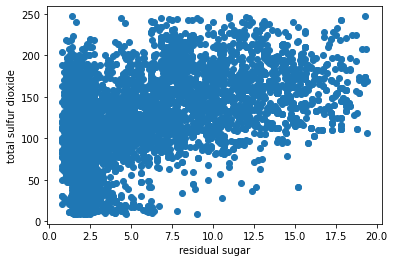

In [17]:
plt.scatter(fixed_data['residual sugar'], fixed_data['total sulfur dioxide'])
plt.xlabel('residual sugar')
plt.ylabel('total sulfur dioxide')
pass

### Обработка пропущенных значений  
Выше мы убедились, что в данных есть пропущенные значения, но их количество несущественно (38 пропущенных значений на 7к строк данных). Все пропущенные значения содержатся в столбцах с численными данными, поэтому заменим их на значение медианы в соответствующих столбцах.

In [18]:
fixed_data.fillna(fixed_data.median(axis = 0, numeric_only = True), axis=0 , inplace=True) 
fixed_data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Основные характеристики  
Посмотрим среднее, среднеквадратичное отклонение, минимальные и максимальные значения по каждому столбцу, а также матрицу корреляций.

In [19]:
fixed_data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000
mean,0.238602,7.193319,0.335704,0.315594,5.418918,0.054347,30.356572,116.067304,0.994671,3.218869,0.526968,10.467870,5.822463
std,0.426265,1.184304,0.155775,0.137598,4.590015,0.025694,16.554108,55.073220,0.002835,0.152715,0.132843,1.152919,0.857996
min,0.000000,5.000000,0.115000,0.000000,0.800000,0.019000,3.000000,9.000000,0.988620,2.860000,0.280000,8.600000,3.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,79.250000,0.992380,3.110000,0.430000,9.500000,5.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,119.000000,0.994900,3.210000,0.510000,10.300000,6.000000
75%,0.000000,7.600000,0.400000,0.390000,8.100000,0.064000,41.000000,156.000000,0.996900,3.320000,0.600000,11.300000,6.000000
max,1.000000,12.700000,0.965000,0.740000,19.400000,0.241000,86.000000,247.000000,1.001400,3.700000,1.120000,13.600000,9.000000


In [20]:
fixed_data.corr()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,0.489724,0.668249,-0.226025,-0.359836,0.604801,-0.482496,-0.711572,0.398193,0.356988,0.485432,-0.033312,-0.117583
fixed acidity,0.489724,1.000000,0.231453,0.290849,-0.134362,0.343061,-0.288389,-0.335694,0.438292,-0.210238,0.298583,-0.070393,-0.073319
volatile acidity,0.668249,0.231453,1.000000,-0.416062,-0.214250,0.447950,-0.366247,-0.431195,0.281588,0.276936,0.225919,-0.053739,-0.256090
citric acid,-0.226025,0.290849,-0.416062,1.000000,0.137513,-0.069194,0.164224,0.219524,0.053737,-0.310557,0.028006,0.014094,0.091877
residual sugar,-0.359836,-0.134362,-0.214250,0.137513,1.000000,-0.155487,0.442802,0.508616,0.539012,-0.273924,-0.191339,-0.374650,-0.037284
chlorides,0.604801,0.343061,0.447950,-0.069194,-0.155487,1.000000,-0.227790,-0.332311,0.438027,0.137017,0.300237,-0.286863,-0.218789
free sulfur dioxide,-0.482496,-0.288389,-0.366247,0.164224,0.442802,-0.227790,1.000000,0.726196,0.046565,-0.168119,-0.190493,-0.187355,0.077734
total sulfur dioxide,-0.711572,-0.335694,-0.431195,0.219524,0.508616,-0.332311,0.726196,1.000000,0.032766,-0.260110,-0.294942,-0.272013,-0.035367
density,0.398193,0.438292,0.281588,0.053737,0.539012,0.438027,0.046565,0.032766,1.000000,0.049753,0.257264,-0.708656,-0.310798
pH,0.356988,-0.210238,0.276936,-0.310557,-0.273924,0.137017,-0.168119,-0.260110,0.049753,1.000000,0.255895,0.093704,0.011663


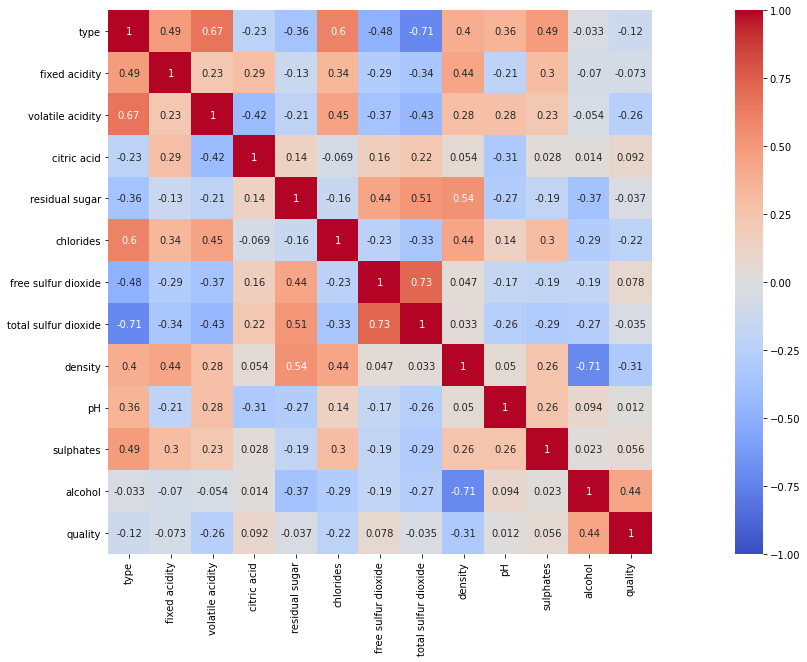

In [21]:
plt.figure(figsize=(30,10))
sns.heatmap(fixed_data.corr(), vmin = -1, vmax = 1, square=True, annot=True, cmap='coolwarm')
pass

По матрице корреляций видна сильная зависимость между свободными диоксидами серы и общими диоксидами серы (что логично), а также прослеживается зависимость между плотностью и остаточным сахаром.

## Разделение на тестовую и обучающие выборки

In [23]:
input_data = norm_data.drop(['quality'], axis = 1)
output_data = fixed_data['quality']

In [24]:
from sklearn.model_selection import train_test_split
in_train, in_test, out_train, out_test = train_test_split(input_data, output_data, test_size = 0.25, random_state = 0) 
in_train.shape, in_test.shape, out_train.shape, out_test.shape

((4507, 12), (1503, 12), (4507,), (1503,))

## Метод k-ближайших соседей  

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(in_train, out_train)

KNeighborsClassifier()

In [26]:
model.score(in_train, out_train), model.score(in_test, out_test)

(0.7073441313512314, 0.5748502994011976)

Попробуем найти оптимальное число соседей

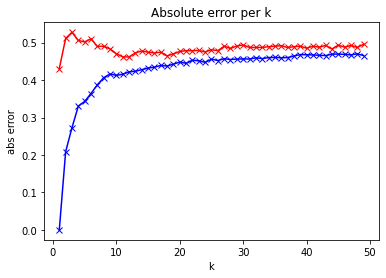

In [28]:
def analize_abs_error_in_knn(min_k, max_k, step):
    train_abs_error = []
    test_abs_error = []
    for k in range(min_k, max_k, step):
        k_model = KNeighborsClassifier(n_neighbors=k)
        k_model.fit(in_train, out_train)
        train_abs_error.append(mean_absolute_error(k_model.predict(in_train), out_train))
        test_abs_error.append(mean_absolute_error(k_model.predict(in_test), out_test))
    plt.plot(range(min_k, max_k, step), train_abs_error, 'bx-', range(min_k, max_k, step), test_abs_error, 'rx-')
    plt.xlabel('k')
    plt.ylabel('abs error')
    plt.title('Absolute error per k')
    plt.show()
    return (train_abs_error, test_abs_error)
    
(train_abs_error, test_abs_error) = analize_abs_error_in_knn(1, 50, 1)

По графикам видим, что при повышении числа соседей ошибка переобучения пропадает, но с другой стороны абсолютная ошибка не ниже ошибки про k=1. Минимальная абсолютная ошибка достигается при k=1.  
Построим матрицу рассогласования:

In [29]:
opt_k = np.argmin(test_abs_error) + 1   # 0-й элемент массива соответствует k=1
print("Min abs error is achieved at k={0}, train error = {1}, test error = {2}".format(opt_k, train_abs_error[opt_k-1], test_abs_error[opt_k-1]))

Min abs error is achieved at k=1, train error = 0.0, test error = 0.4304723885562209


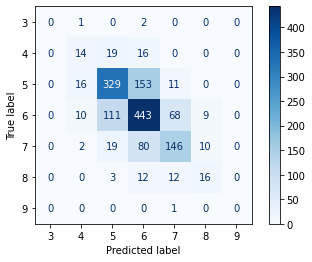

In [30]:
from sklearn.metrics import plot_confusion_matrix
model = KNeighborsClassifier(n_neighbors=opt_k)
model.fit(in_train, out_train)
plot_confusion_matrix(model, in_test, out_test, cmap=plt.cm.Blues)
pass

По графику видим, что ошибка чаще всего возникает на близких классах.

## Логистическая регрессия

Логистическая регрессия
Ошибка на обучающем датасете: 0.448413578877302
Ошибка на тестовом датасете: 0.46506986027944114


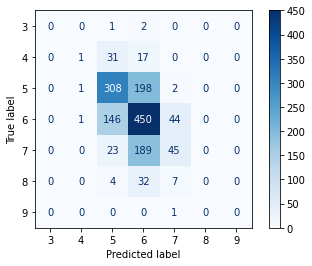

In [31]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(max_iter=10000)
lg.fit(in_train, out_train)
y_train_predict = lg.predict(in_train)
y_test_predict = lg.predict(in_test)

err_train = np.mean(out_train != y_train_predict)
err_test  = np.mean(out_test  != y_test_predict)

print("Логистическая регрессия")
print("Ошибка на обучающем датасете: {}".format(err_train))
print("Ошибка на тестовом датасете: {}".format(err_test))

plot_confusion_matrix(lg, in_test, out_test, cmap=plt.cm.Blues)
pass

## Деревья решений

деревья решений
Ошибка на обучающем датасете: 0.0
Ошибка на тестовом датасете: 0.41051230871590155


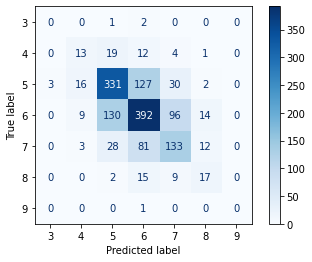

In [32]:
from sklearn.tree import DecisionTreeClassifier

tm = DecisionTreeClassifier()
tm.fit(in_train, out_train)
y_train_predict = tm.predict(in_train)
y_test_predict = tm.predict(in_test)

err_train = np.mean(out_train != y_train_predict)
err_test  = np.mean(out_test  != y_test_predict)

print("деревья решений")
print("Ошибка на обучающем датасете: {}".format(err_train))
print("Ошибка на тестовом датасете: {}".format(err_test))

plot_confusion_matrix(tm, in_test, out_test, cmap=plt.cm.Blues)
pass

## Случайный лес

Случайный лес
Ошибка на обучающем датасете: 0.0
Ошибка на тестовом датасете: 0.3286759813705922
Матрица ошибок:


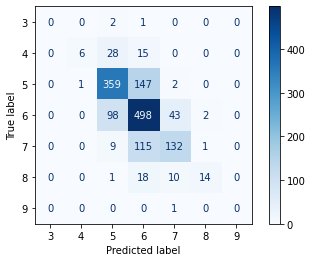

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(in_train, out_train)
y_train_predict = rf.predict(in_train)
y_test_predict = rf.predict(in_test)

err_train = np.mean(out_train != y_train_predict)
err_test  = np.mean(out_test  != y_test_predict)

print("Случайный лес")
print("Ошибка на обучающем датасете: {}".format(err_train))
print("Ошибка на тестовом датасете: {}".format(err_test))

from sklearn.metrics import confusion_matrix
print("Матрица ошибок:")
plot_confusion_matrix(rf, in_test, out_test, cmap=plt.cm.Blues)
pass

## Выводы

Все методы показывают достаточно большую ошибку, но случайный лес дает меньшую из всех